In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
def load_and_plot_individual_results(csv_files, confidence_level=0.95):
    """
    参数:
    - csv_files: CSV 文件名的列表。
    - confidence_level: 置信水平，默认值为 0.95。
    """
    # 计算置信区间的 Z 值
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    
    # 准备线条颜色和标签
    line_colors = ['blue', 'red', 'green', 'orange', 'black', 'grey']
    line_styles = ['-', '--', ':', '-.', '-', '--']  # 为每一条线添加样式
    labels = ['Ackley 10D', 'Ackley 5D', 'branin', 'Hartmann']

    # 创建一个包含 2x2 网格的图形
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    for idx, csv_filename in enumerate(csv_files):
        # 检查 CSV 文件是否存在
        if not os.path.exists(csv_filename):
            raise FileNotFoundError(f"File {csv_filename} does not exist.")

        # 从 CSV 文件中读取数据
        df_results = pd.read_csv(csv_filename)

        # 计算每一列的均值和标准误差
        means_bayes = df_results.filter(like='results0_Metric_').mean(axis=0)
        standard_errors0 = df_results.filter(like='results0_Metric_').sem(axis=0)
        ci_bayes = z_value * standard_errors0

        means_bayes1 = df_results.filter(like='results1_Metric_').mean(axis=0)
        standard_errors1 = df_results.filter(like='results1_Metric_').sem(axis=0)
        ci_bayes1 = z_value * standard_errors1

        means_random = df_results.filter(like='results2_Metric_').mean(axis=0)
        standard_errors2 = df_results.filter(like='results2_Metric_').sem(axis=0)
        ci_random = z_value * standard_errors2

        means_orthogonal = df_results.filter(like='results3_Metric_').mean(axis=0)
        standard_errors3 = df_results.filter(like='results3_Metric_').sem(axis=0)
        ci_orthogonal = z_value * standard_errors3

        means_bayes2 = df_results.filter(like='results4_Metric_').mean(axis=0)
        standard_errors4 = df_results.filter(like='results4_Metric_').sem(axis=0)
        ci_bayes2 = z_value * standard_errors4

        means_bayes3 = df_results.filter(like='results5_Metric_').mean(axis=0)
        standard_errors5 = df_results.filter(like='results5_Metric_').sem(axis=0)
        ci_bayes3 = z_value * standard_errors5
        
        # x轴的索引
        x = np.arange(len(means_bayes))

        # 找到对应的子图位置
        ax = axs[idx // 2, idx % 2]

        # 使用不同颜色绘制带有误差条的均值图
        ax.errorbar(x, means_random, yerr=ci_random, fmt='o', label='random', 
                    color=line_colors[0], linestyle=line_styles[0], ecolor=line_colors[0], capsize=5)

        ax.errorbar(x, means_orthogonal, yerr=ci_orthogonal, fmt='o', label='orthogonal', 
                    color=line_colors[2], linestyle=line_styles[2], ecolor=line_colors[2], capsize=5)
        ax.errorbar(x, means_bayes, yerr=ci_bayes, fmt='o', label='MTGP+qlogNEI', 
                    color=line_colors[3], linestyle=line_styles[3], ecolor=line_colors[3], capsize=5)
        ax.errorbar(x, means_bayes2, yerr=ci_bayes2, fmt='o', label='MTGP+qlogEI', 
                    color=line_colors[4], linestyle=line_styles[4], ecolor=line_colors[4], capsize=5)
        ax.errorbar(x, means_bayes3, yerr=ci_bayes3, fmt='o', label='STGP+qlogEI', 
                    color=line_colors[5], linestyle=line_styles[5], ecolor=line_colors[5], capsize=5)
        ax.errorbar(x, means_bayes1, yerr=ci_bayes1, fmt='o', label='STGP+qlogNEI', 
                    color=line_colors[1], linestyle=line_styles[1], ecolor=line_colors[1], capsize=5)        
        # 设置子图的标题和标签
        ax.set_title(f'Optimal values and confidence intervals ({labels[idx]})')
        ax.set_xlabel('Number of Iterations')
        ax.set_ylabel('The optimal value')

        # 添加图例
        ax.legend()

    # 调整布局
    fig.tight_layout()

    # 保存图像
    plt.savefig('Ackley_Cos_Hartmann_Individual_Plots_Colored_Lines.png', dpi=300)
    # 显示图形
    plt.show()



In [3]:
def load_and_plot_individual_results1(csv_files, x_values_list, confidence_level=0.95):
    """
    参数:
    - csv_files: CSV 文件名的列表。
    - x_values_list: 每个文件对应的初始 x 值的列表。
    - confidence_level: 置信水平，默认值为 0.95。
    """
    # 计算置信区间的 Z 值
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # 准备线条颜色和标签
    line_colors = ['blue', 'red', 'green', 'orange', 'black', 'grey']
    line_styles = ['-', '--', ':', '-.', '-', '--']  # 为每一条线添加样式
    labels = ['Ackley 10D', 'Ackley 5D', 'branin', 'Hartmann']

    # 创建一个包含 2x2 网格的图形
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    for idx, csv_filename in enumerate(csv_files):
        # 检查 CSV 文件是否存在
        if not os.path.exists(csv_filename):
            raise FileNotFoundError(f"File {csv_filename} does not exist.")

        # 从 CSV 文件中读取数据
        df_results = pd.read_csv(csv_filename)

        # 计算每一列的均值和标准误差
        means_bayes = np.log(np.abs(df_results.filter(like='results0_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors0 = means_bayes.sem(axis=0)
        ci_bayes = z_value * standard_errors0  # 计算置信区间
        
        means_bayes1 = np.log(np.abs(df_results.filter(like='results1_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors1 = means_bayes1.sem(axis=0)
        ci_bayes1 = z_value * standard_errors1
        
        means_random = np.log(np.abs(df_results.filter(like='results2_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors2 = means_random.sem(axis=0)
        ci_random = z_value * standard_errors2
        
        means_orthogonal = np.log(np.abs(df_results.filter(like='results3_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors3 = means_orthogonal.sem(axis=0)
        ci_orthogonal = z_value * standard_errors3
        
        means_bayes2 = np.log(np.abs(df_results.filter(like='results4_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors4 =  means_bayes2.sem(axis=0)
        ci_bayes2 = z_value * standard_errors4
        
        means_bayes3 = np.log(np.abs(df_results.filter(like='results5_Metric_').mean(axis=0) - x_values_list[idx]))
        standard_errors5 =  means_bayes3.sem(axis=0)
        ci_bayes3 = z_value * standard_errors5
        
        # x 轴的索引
        x = np.arange(len(means_bayes))
        x_values = np.abs(x - x_values_list[idx])  # 使用每个文件对应的 x_values_list

        # 找到对应的子图位置
        ax = axs[idx // 2, idx % 2]

        # 使用不同颜色绘制带有误差条的均值图
        ax.errorbar(x, means_random, yerr=ci_random, fmt='o', label='random', 
                    color=line_colors[0], linestyle=line_styles[0], ecolor=line_colors[0], capsize=5)
        ax.errorbar(x, means_orthogonal, yerr=ci_orthogonal, fmt='o', label='orthogonal', 
                    color=line_colors[2], linestyle=line_styles[2], ecolor=line_colors[2], capsize=5)
        ax.errorbar(x, means_bayes, yerr=ci_bayes, fmt='o', label='MTGP+qlogNEI', 
                    color=line_colors[3], linestyle=line_styles[3], ecolor=line_colors[3], capsize=5)
        ax.errorbar(x, means_bayes2, yerr=ci_bayes2, fmt='o', label='MTGP+qlogEI', 
                    color=line_colors[4], linestyle=line_styles[4], ecolor=line_colors[4], capsize=5)
        ax.errorbar(x, means_bayes3, yerr=ci_bayes3, fmt='o', label='STGP+qlogEI', 
                    color=line_colors[5], linestyle=line_styles[5], ecolor=line_colors[5], capsize=5)
        ax.errorbar(x, means_bayes1, yerr=ci_bayes1, fmt='o', label='STGP+qlogNEI', 
                    color=line_colors[1], linestyle=line_styles[1], ecolor=line_colors[1], capsize=5)        

        # 设置子图的标题和标签
        ax.set_title(f'Optimal values and confidence intervals ({labels[idx]})')
        ax.set_xlabel('Number of Iterations (Log |x|)')
        ax.set_ylabel('Log of Absolute Optimal Value Difference')

        # 添加图例
        ax.legend()

    # 调整布局
    fig.tight_layout()

    # 保存图像
    plt.savefig('Ackley_Cos_Hartmann_Individual_Plots_Colored_Lines.png', dpi=300)
    # 显示图形
    plt.show()


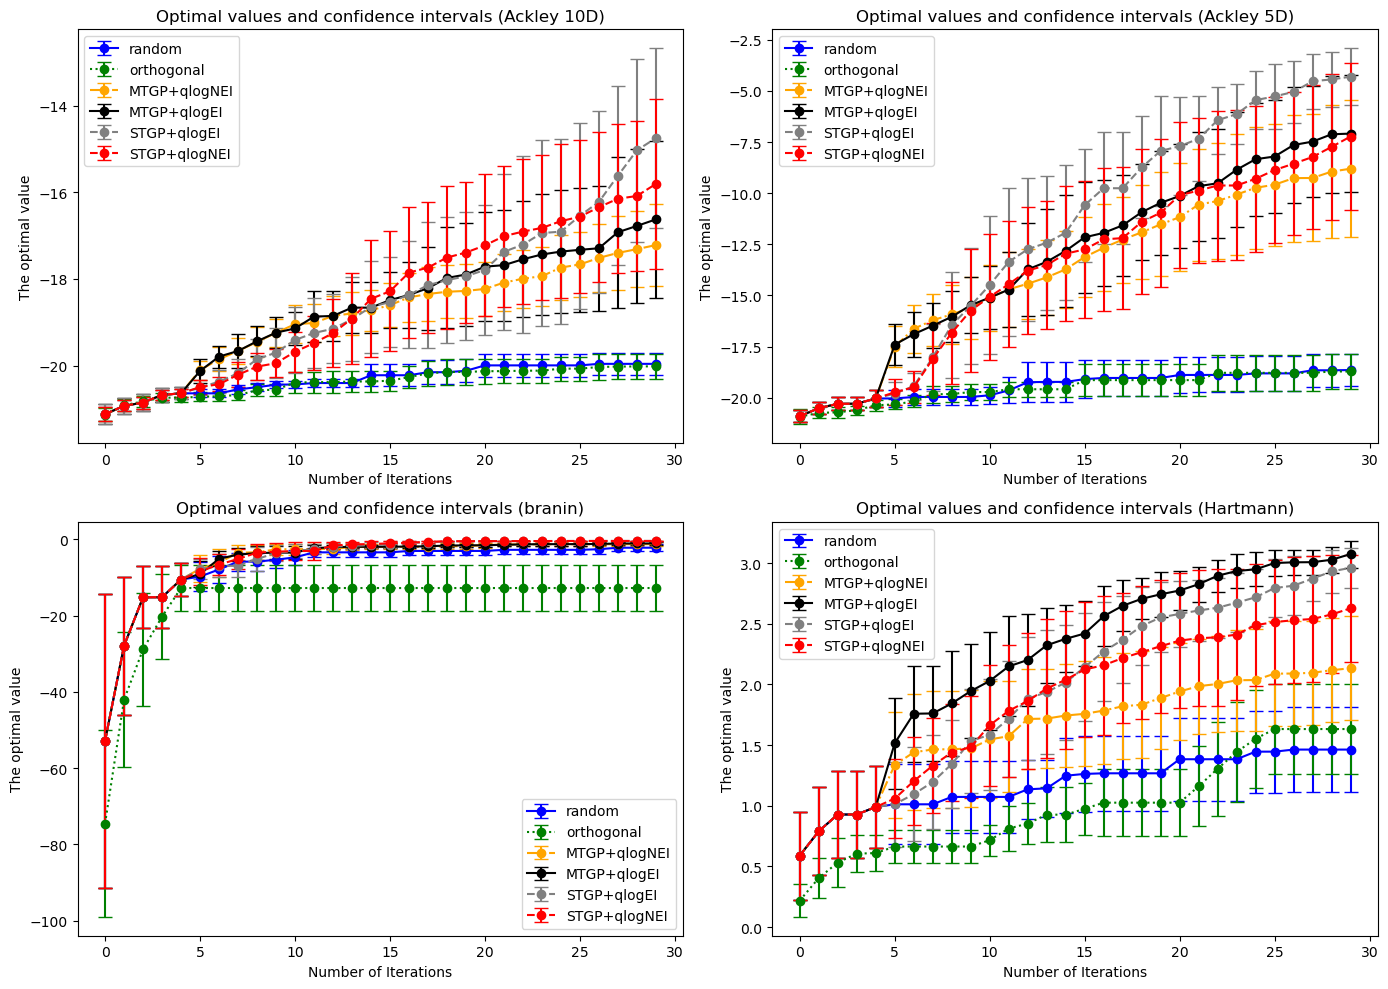

In [4]:
# 定义文件名列表
csv_files = [ 'all_results_ackley10.csv', 'all_results_ackley5.csv', 'all_results_branin.csv', 'all_results_hantman.csv']

# 调用函数并绘图
load_and_plot_individual_results(csv_files)

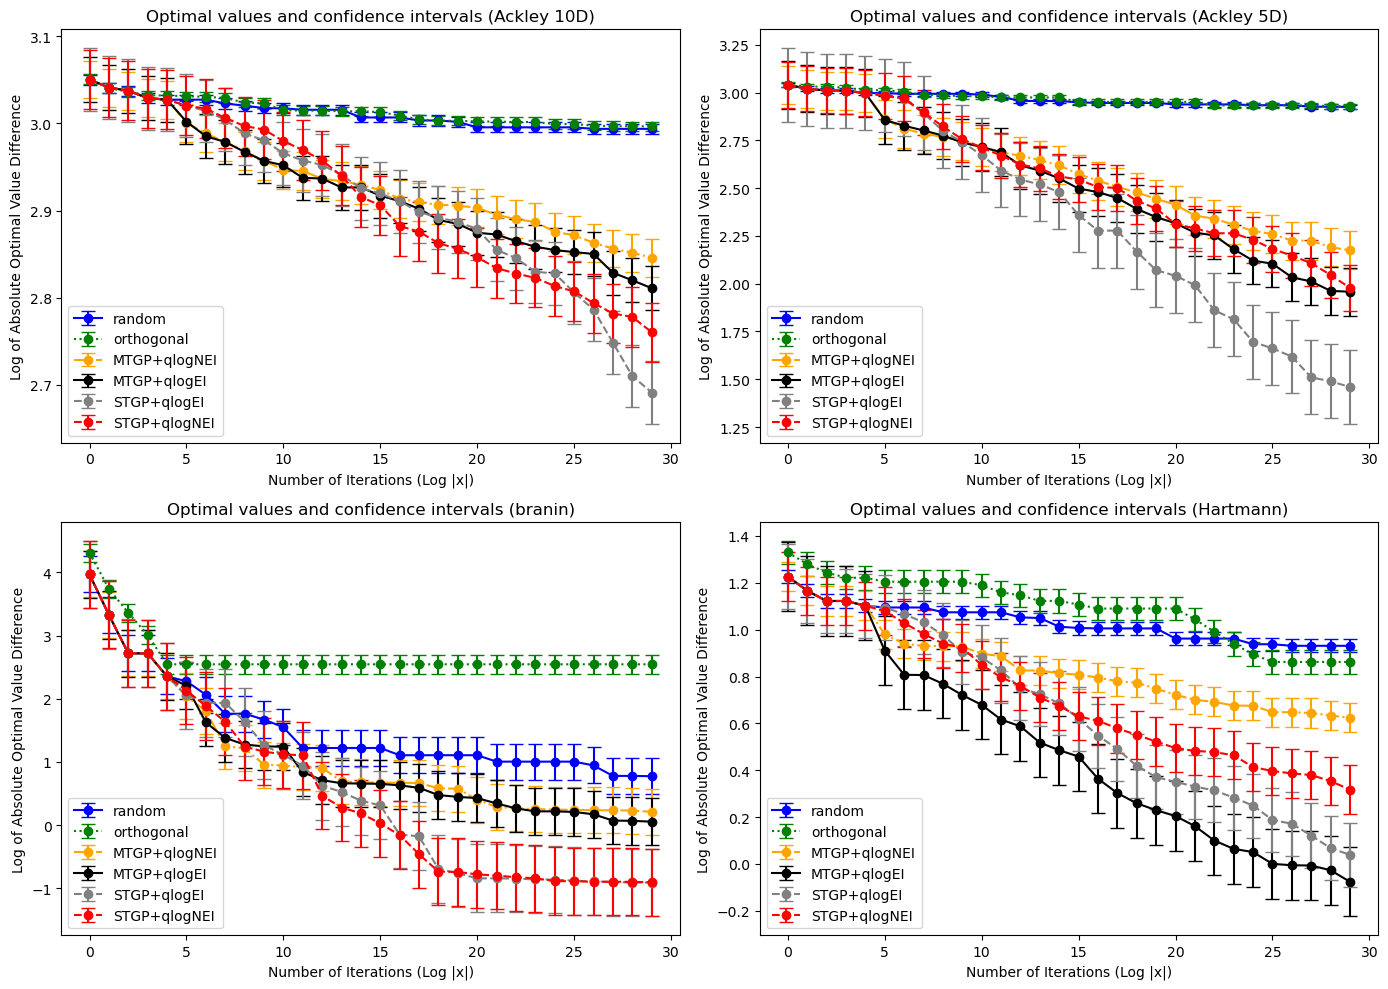

In [5]:
# 定义文件名列表
csv_files = [ 'all_results_ackley10.csv', 'all_results_ackley5.csv', 'all_results_branin.csv', 'all_results_hantman.csv']
x_values_list = [0, 0, 0,4]  # 每个文件对应的 x 值设为 0
# 调用函数并绘图
load_and_plot_individual_results1(csv_files, x_values_list)

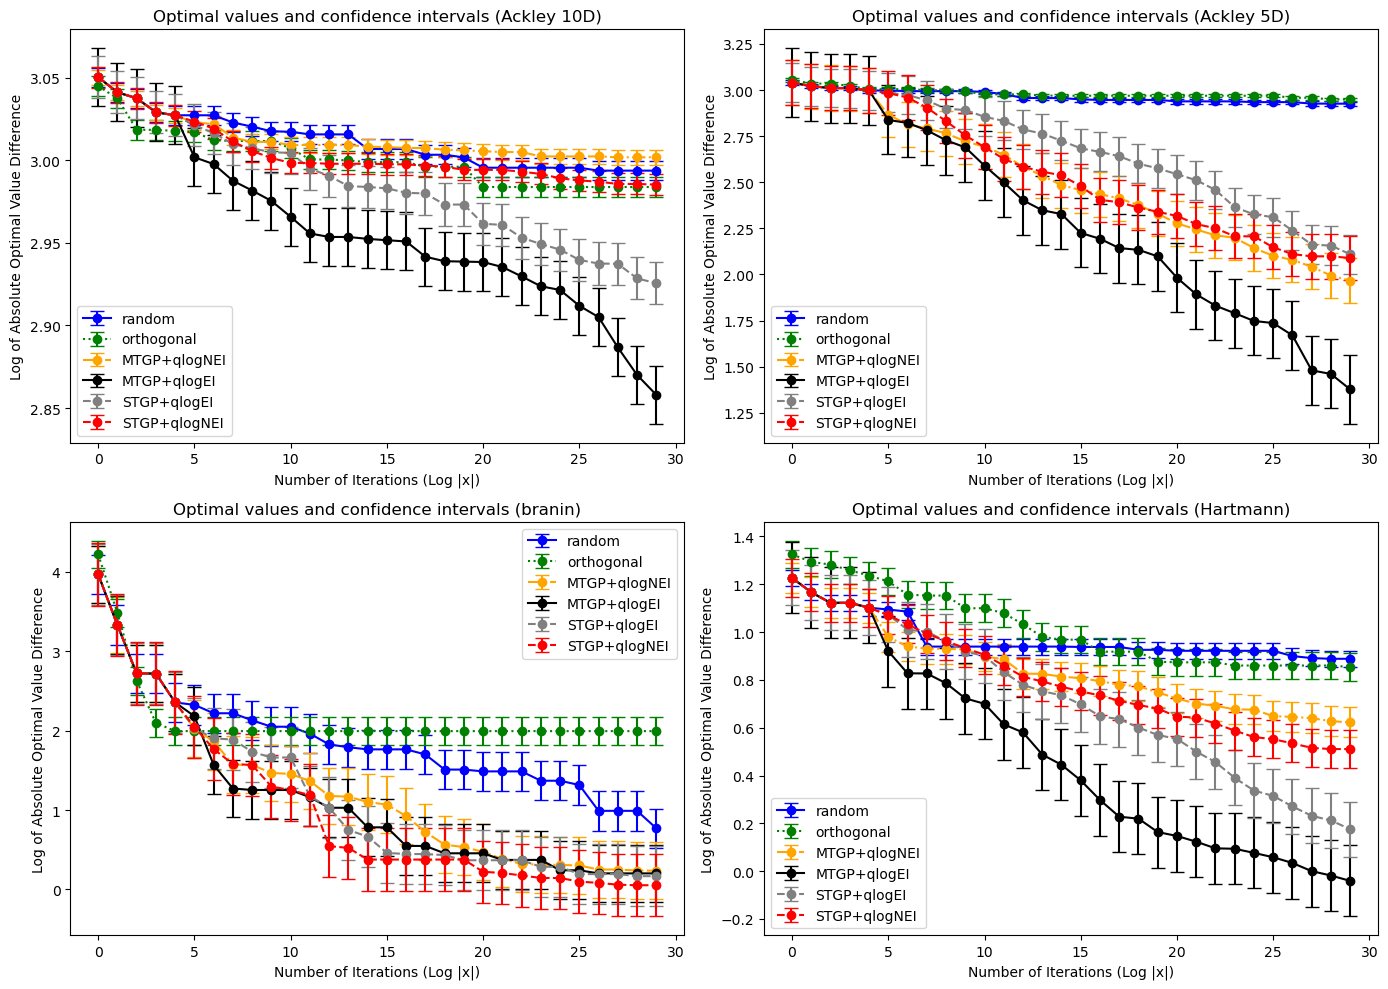

In [6]:
# 定义文件名列表
csv_files = [ 'all_results_ackley10.噪声2.csv', 'all_results_ackley5.噪声2.csv', 'all_results_branin.噪声2.csv', 'all_results_hantman.噪声2.csv']
x_values_list = [0, 0, 0,4]  # 每个文件对应的 x 值设为 0
# 调用函数并绘图
load_and_plot_individual_results1(csv_files, x_values_list)